# Homework Sheet No. 2
Due Date: May 31st, 2022
### Submitted by 
- Cholin Kim (1133547)
- Philipp Gehring (1104946)
- Lukas Heimann (1119153)



In [5]:
using Pkg
Pkg.activate(".")
include("utils.jl")

using ImageFiltering
using ImageView
using Plots
using TestImages
using LinearAlgebra

  Activating new project at `~/git/vmm-exercise/final/sh02`


# Excercise 1
## Code

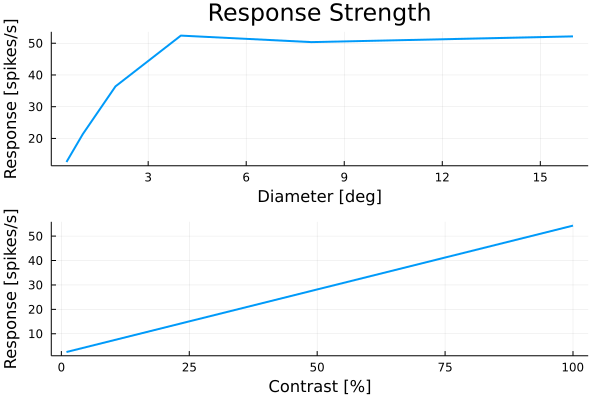

In [9]:
"""
    Model of the LGN
"""
function lgn(
    stimulus;
    σ_c = 0.5,
    σ_s = 1.5,
    k = 0.9,
    σ_sf = 1.4,
    σ_u = 0.3,
    σ_d = 0.5,
    k_d = 0.5,
    c50 = 0.1,
    Vmax = 273.0,
    V_0 = -6,
)
    # calculate receptive field response
    filter_cs = Main.Utils.customDoG(σ_c, σ_s, k)
    L = imfilter(stimulus, reflect(filter_cs))

    # calculate suppresive field response
    H = Main.Utils.customDoG(σ_u, σ_d, k_d)
    Gsf = Kernel.gaussian(σ_sf)

    # calculate c_local
    f = buf->sqrt(sum(dot(Gray.(imfilter(buf, reflect(H)).^2), Gray.(parent(Gsf)))))
    c_local = Main.Utils.normalize(mapwindow(f, stimulus, size(Gsf)))

    # normalize response 
    V = Vmax * (L ./ (c50 .+ c_local))

    # return rectified response
    return max.(V .- V_0, 0)
end


#######################################################################################
# Exercise 1
stimulus = Main.Utils.stimulus()
p_in = plot(Gray.(stimulus), 
                title = "Stimulus"
            )

out = lgn(stimulus)
p_out = plot(Gray.(Main.Utils.normalize(out)), 
                title = "Response"
                )

plot(p_in, p_out, layout = (1, 2))
# savefig("./stim-resp.svg")


# Plot response strength (varying diameter)
outline_diameter = [0.5, 1, 2, 4, 8, 16]
outputs = Array{Float64}(undef, length(outline_diameter))

for i in 1:length(outline_diameter)
    stimulus = Main.Utils.stimulus(radius=0.5*outline_diameter[i]*Main.Utils.ppd)
    out = lgn(stimulus, Vmax=128.0, V_0=-2)
    outputs[i] = maximum(out)
end

p1 = plot(collect(zip(outline_diameter, outputs)), 
            lw = 2, 
            xlabel="Diameter [deg]", 
            ylabel="Response [spikes/s]", 
            label=false
            )

# Plot response strength (varying contrast)
contrasts = [0.01, 0.25, 0.50, 0.75, 1.0]
outputs = Array{Float64}(undef, length(contrasts))

for i in 1:length(contrasts)
    stimulus = Main.Utils.stimulus(contrast=contrasts[i])
    out = lgn(stimulus, Vmax=128.0, V_0=-2)
    outputs[i] = maximum(out)
end

p2 = plot(collect(zip(contrasts.*100, outputs)), 
            lw = 2, 
            xlabel="Contrast [%]", 
            xlims=(0,10), 
            ylabel="Response [spikes/s]", 
            label=false
            )

plot(p1, p2, 
        layout=(2, 1), 
        plot_title="Response Strength"
        )
# savefig("./response-strength.svg")

## Description


# Exercise 2
## Code

In [7]:
img = testimage("lake")
stimulus = Gray.(img)

p_in = plot(stimulus, title = "Stimulus")

out = lgn(Float64.(stimulus))
p_out = plot(Gray.(Main.Utils.normalize(out)), title = "Response LGN")

filter_cs = Main.Utils.customDoG(0.5, 1.5, 0.9)
out_frf = imfilter(stimulus, reflect(filter_cs))
p_frf = plot(Gray.(Main.Utils.normalize(out_frf)), title = "Response center-surround filter")

out_DoG = imfilter(out_frf, reflect(Kernel.DoG(1)))
p_DoG = plot(Gray.(Main.Utils.normalize(out_DoG)), title = "Response DoG filter")

plot(p_in, p_out, p_frf, p_DoG, layout = (2, 2))


## Description
